# Optymalizacja na sieciach neuronowych

**Zadanie 1.** Proszę zapoznać się z przykładami zamieszczonymi na stronie [https://playground.tensorflow.org](https://playground.tensorflow.org).

**Zadanie 2.** Proszę zapoznać się z kodem z pliku [Tensorflow_XOR.ipynb](Tensorflow_XOR.ipynb). Proszę wytrenować swoją sieć (można zmienić parametry - np. 4 neurony w warstwie ukrytej, dwa na wyjściu. Tak, jak w przykładzie z playground.tensorflow.org). Proszę znaleźć "adversarial input" - x, y najbliżej 0,0, które sieć klasyfikuje jako "1".

**Zadanie 3.** Dla ambitnych - to, co w drugim punkcie, dla MNIST. Kod uczący małą sieć można znaleźć w pliku [Tensorflow_MNIST.ipynb](Tensorflow_MNIST.ipynb). Trzeba to uruchomić lokalnie (sage do tensorflow nie jest potrzebny), tu brak pamięci.

Instalacja:

```
python3 -m venv ~/envs/opt
source ~/envs/opt/bin/activate
python3 -m pip install --upgrade pip
python3 -m pip install tensorflow-cpu
```

Kod do zapisania w pliku `mnist.py`:

```python
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

##
## Konstrukcja modelu
##
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

##
## Uczenie
##
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)
model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))

print(model.weights)
```

Uruchomienie:
```
python3 mnist.py
```

U mnie dało wynik:
```
2021-06-08 15:50:25.518594: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-06-08 15:50:25.584630: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-06-08 15:50:25.601585: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3598605000 Hz
Epoch 1/12
469/469 [==============================] - 1s 1ms/step - loss: 3.8048 - accuracy: 0.4090 - val_loss: 1.4702 - val_accuracy: 0.4991
Epoch 2/12
469/469 [==============================] - 0s 967us/step - loss: 1.1812 - accuracy: 0.6315 - val_loss: 1.0180 - val_accuracy: 0.7025
Epoch 3/12
469/469 [==============================] - 0s 923us/step - loss: 0.8410 - accuracy: 0.7537 - val_loss: 0.7662 - val_accuracy: 0.7877
Epoch 4/12
469/469 [==============================] - 0s 946us/step - loss: 0.6643 - accuracy: 0.8161 - val_loss: 0.6538 - val_accuracy: 0.8588
Epoch 5/12
469/469 [==============================] - 0s 940us/step - loss: 0.5294 - accuracy: 0.8663 - val_loss: 0.5214 - val_accuracy: 0.8752
Epoch 6/12
469/469 [==============================] - 0s 952us/step - loss: 0.4266 - accuracy: 0.8917 - val_loss: 0.4517 - val_accuracy: 0.8977
Epoch 7/12
469/469 [==============================] - 0s 1ms/step - loss: 0.3680 - accuracy: 0.9047 - val_loss: 0.4200 - val_accuracy: 0.9034
Epoch 8/12
469/469 [==============================] - 0s 1ms/step - loss: 0.3286 - accuracy: 0.9125 - val_loss: 0.3929 - val_accuracy: 0.9086
Epoch 9/12
469/469 [==============================] - 0s 950us/step - loss: 0.3081 - accuracy: 0.9190 - val_loss: 0.3525 - val_accuracy: 0.9165
Epoch 10/12
469/469 [==============================] - 0s 968us/step - loss: 0.2869 - accuracy: 0.9249 - val_loss: 0.3322 - val_accuracy: 0.9242
Epoch 11/12
469/469 [==============================] - 0s 1ms/step - loss: 0.2681 - accuracy: 0.9280 - val_loss: 0.3175 - val_accuracy: 0.9219
Epoch 12/12
469/469 [==============================] - 0s 996us/step - loss: 0.2544 - accuracy: 0.9310 - val_loss: 0.3399 - val_accuracy: 0.9278
[<tf.Variable 'dense/kernel:0' shape=(784, 30) dtype=float32, numpy=
array([[ 0.02194494,  0.03019185, -0.01404159, ..., -0.04433255,
         0.03499909,  0.08212437],
       [ 0.03753106,  0.00360342, -0.04411432, ...,  0.03267342,
         0.03652315,  0.06408411],
       [-0.08076084,  0.0468931 , -0.07058869, ...,  0.00066464,
         0.05688802, -0.01981168],
       ...,
```

Oczywiście to tylko wagi wyuczonej (mniej lub bardziej) sieci. Teraz, żeby znaleźć "adversarial input", trzeba wygenerować odpowiedni problem liniowy. Można np. poszukać obrazka, najbliższego w normie $\ell_1$ lub $\ell_\infty$, do cyfry `x_train[0]`, którego sieć nie sklasyfikuje jako 5, a jako 1.

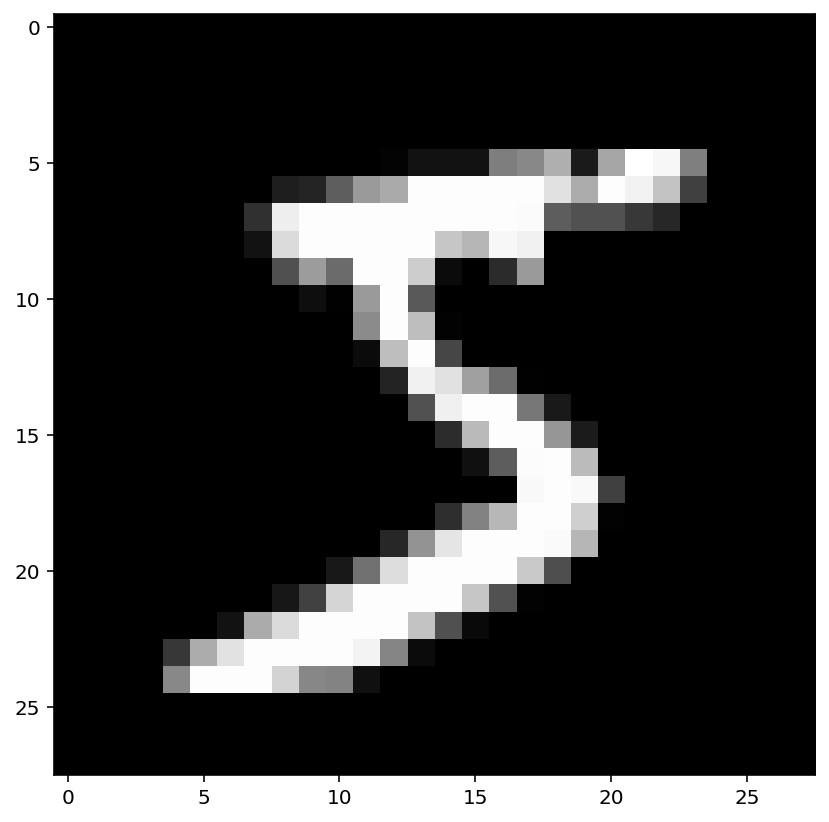

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data(path='../../wyklady/Optymalizacja na sieciach neuronowych/mnist.npz')

from matplotlib.pyplot import imshow

imshow(x_train[0], cmap='gray')